In [ ]:
'''After recipes have been mapped to ingredient space and flavor space
Plot tsne clustering
Plot with bokeh interactive plotting
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed', init="random").fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()

#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
def plot_bokeh(df,sublist,filename):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed', init="random").fit_transform(dist)
    #cannot use seaborn palette for bokeh
    # palette =['red','green','blue','yellow']
    # colors =[]
    # for i in range(len(sublist)):
    #     for j in range(lenlist[i+1]-lenlist[i]):
    #         colors.append(palette[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName']))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(title="flavor clustering")

    p.circle('x', 'y', size=10, source=source)

    show(p)


if __name__ == '__main__':
    yum_ingr = pd.read_pickle('data/yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('data/yummly_ingrX.pkl')
    yum_tfidf = pd.read_pickle('data/yum_tfidf.pkl')

    #select four cuisines and plot tsne clustering with ingredients
    
    df_ingr = yum_ingrX.copy()
    sublist = list(set(yum_ingr['cuisine']))
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_ingr,sublist)

    #select four cuisines and plot tsne clustering with flavor
    df_flavor = yum_tfidf.copy()
    sublist = list(set(yum_ingr['cuisine']))
    df_flavor['cuisine'] = yum_ingr['cuisine']
    df_flavor['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_flavor,sublist)

    #select four cuisines and do interactive plotting with bokeh
    plot_bokeh(df_flavor,sublist, 'test1.html')
    plot_bokeh(df_ingr,sublist, 'test2.html')


(5622, 236) [0, 266, 699, 976, 1167, 1588, 1929, 2049, 2407, 2566, 2852, 3016, 3214, 3625, 3853, 4040, 4133, 4280, 4372, 4556, 4740, 4757, 4935, 5137, 5421, 5622]


/var/folders/_m/w5ywmxlj4n957rz1czm0c9wh0000gn/T/ipykernel_14157/2471944456.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


(3814, 1107) [0, 266, 686, 961, 1029, 1078, 1416, 1536, 1894, 1894, 2180, 2310, 2416, 2826, 2832, 3019, 3019, 3166, 3166, 3166, 3350, 3367, 3411, 3613, 3613, 3814]


In [1]:
import bokeh

In [2]:
print(bokeh.__version__)

3.0.3


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
yum_ingr = pd.read_pickle('data/yummly_ingr.pkl')
yum_ingrX = pd.read_pickle('data/yummly_ingrX.pkl')
yum_tfidf = pd.read_pickle('data/yum_tfidf.pkl')

#select four cuisines and plot tsne clustering with ingredients

df_ingr = yum_ingrX.copy()
# sublist = list(set(yum_ingr['cuisine']))
df_ingr['cuisine'] = yum_ingr['cuisine']
df_ingr['recipeName'] = yum_ingr['recipeName']

print(df_ingr.keys())

Index(['almond', 'anise', 'apple', 'apricot', 'artichoke', 'asparagus',
       'avocado', 'bacon', 'banana', 'barley',
       ...
       'whitefish', 'whole grain wheat flour', 'wine', 'wood', 'yam', 'yeast',
       'yogurt', 'zucchini', 'cuisine', 'recipeName'],
      dtype='object', length=238)


In [6]:
df = pd.DataFrame(df_ingr)

In [7]:
df_dropped = df.drop(columns=['cuisine', 'recipeName'])
df_dropped_encoded = pd.get_dummies(df_dropped, columns=df_dropped.columns, drop_first=True)

NameError: name 'X_encoded' is not defined

In [15]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dropped_encoded)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA output back to a DataFrame for easier handling
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the PCA result
print(pca_df)

      Principal Component 1  Principal Component 2
0                 -2.490783              -1.011633
1                 -0.690057              -0.474103
2                 -0.902687              -0.698736
3                 -1.485827              -1.202679
4                 -1.452261              -1.412869
...                     ...                    ...
5617               4.578969              -1.806938
5618               9.090491              -0.840867
5619               2.618344              -0.254918
5620               6.718070              -3.377124
5621               4.137933              -1.115565

[5622 rows x 2 columns]


In [16]:
pca.explained_variance_

array([5.08162563, 3.98992438])

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [14]:
print(X_pca)

[[-2.49078324 -1.01163331 -1.02604819 ... -0.32315045  0.24399604
   0.07080429]
 [-0.69005721 -0.4741035  -0.52162306 ...  0.04007203  0.45938342
  -0.17028573]
 [-0.90268654 -0.69873585  0.2682355  ...  0.03134931  0.05500043
   0.16008482]
 ...
 [ 2.61834351 -0.25491849  1.35000804 ... -0.70287503  0.25933573
   0.11101472]
 [ 6.7180703  -3.37712392 -0.93003665 ...  0.14725529  0.27072077
   0.1432133 ]
 [ 4.13793335 -1.11556517  2.28272977 ...  0.23434657  0.22632781
   0.21660812]]


In [21]:
# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

print(explained_variance, cumulative_variance)

[0.02152848 0.01690345] [0.02152848 0.03843193]


Percentage of variability explained by each component:
Component 1: 2.15%
Component 2: 1.69%

Number of components required to explain 95% variability: 1


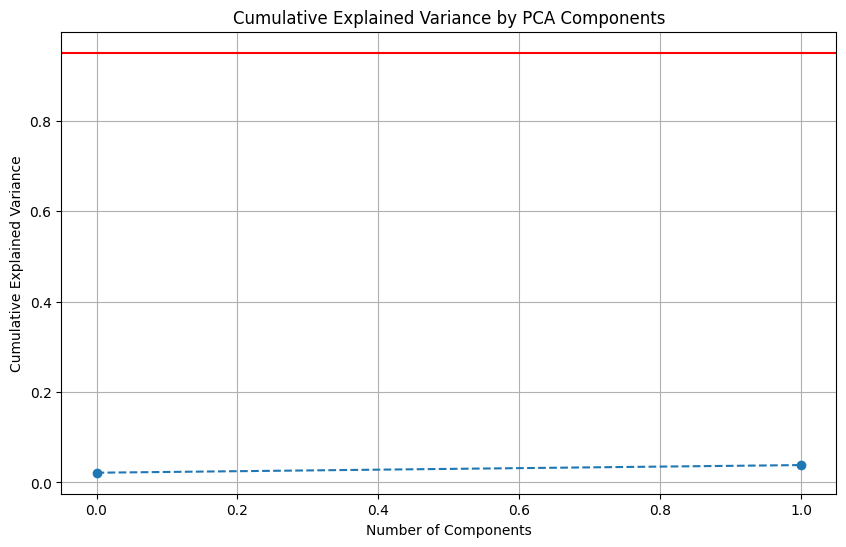

In [23]:
# Determine the number of components needed to explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 because np.argmax returns 0-based index

# Print the percentage of variability explained by each component
print("Percentage of variability explained by each component:")
for i, var in enumerate(explained_variance):
    print(f"Component {i + 1}: {var * 100:.2f}%")

# Print the number of components needed to explain 95% variability
print(f"\nNumber of components required to explain 95% variability: {n_components_95}")

# Optional: Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()